In [1]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
from plotnine import *

# 아래 링크에서 seoul bike history 데이터 받기
https://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15182&srvType=F&serviceKind=1&currentPageNo=1

In [3]:
# unix
!ls '23_서울특별시_공공자전거_대여이력_정보_2018년_2분기_4.csv'
# windows
# %ls '23_서울특별시_공공자전거_대여이력_정보_2018년_2분기_4.csv'

23_서울특별시_공공자전거_대여이력_정보_2018년_2분기_4.csv


In [4]:
df = pd.read_csv('23_서울특별시_공공자전거_대여이력_정보_2018년_2분기_4.csv', encoding='cp949', engine='python')
df.shape

(586304, 11)

In [5]:
df.head()

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
0,'SPB-11906','2018-06-16 00:00:07','932',' 예일여중',1,'2018-06-16 00:16:41','934',' 신사동 성당',11,15,2160
1,'SPB-16954','2018-06-16 00:00:07','272',' 당산육갑문',16,'2018-06-16 02:00:36','1827',' 독산보도육교 앞 자전거 보관소',9,120,18100
2,'SPB-09676','2018-06-16 00:00:11','1036',' 고덕동 주양쇼핑',7,'2018-06-16 00:24:05','1038',' 강일 다솜 어린이 공원',9,23,3350
3,'SPB-07143','2018-06-16 00:00:15','1726',' 삼익세라믹아파트교차로',7,'2018-06-16 00:15:31','1706',' 기업은행 앞',9,14,1480
4,'SPB-13007','2018-06-16 00:00:16','2058',' 노량진동 맥도널드앞',10,'2018-06-16 00:14:25','258',' 신길역3번출구',8,13,2920


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586304 entries, 0 to 586303
Data columns (total 11 columns):
'자전거번호'      586304 non-null object
'대여일시'       586304 non-null object
'대여대여소번호'    586304 non-null object
'대여대여소명'     586304 non-null object
'대여거치대'      586304 non-null int64
'반납일시'       586304 non-null object
'반납대여소번호'    586304 non-null object
'반납대여소명'     586304 non-null object
'반납거치대'      586304 non-null int64
'이용시간(분)'    586304 non-null int64
'이용거리(M)'    586304 non-null int64
dtypes: int64(4), object(7)
memory usage: 49.2+ MB


In [7]:
df.describe()

,'대여거치대','반납거치대','이용시간(분)','이용거리(M)'
count,586304.000000,586304.000000,586304.000000,586304.000000
mean,6.981460,6.939248,28.922530,4712.563602
std,5.217671,5.196975,30.866556,9003.052657
min,1.000000,1.000000,2.000000,0.000000
25%,3.000000,3.000000,9.000000,1320.000000
50%,6.000000,6.000000,18.000000,2530.000000
75%,10.000000,10.000000,40.000000,5290.000000
max,40.000000,40.000000,4320.000000,255070.000000


In [8]:
df.describe(include=np.object)

,'자전거번호','대여일시','대여대여소번호','대여대여소명','반납일시','반납대여소번호','반납대여소명'
count,586304,586304,586304,586304,586304,586304,586304
unique,12970,426750,1267,1267,427833,1269,1269
top,'SPB-18238','2018-06-18 18:56:44','207',' 여의나루역 1번출구 앞','2018-06-19 19:53:32','113',' 홍대입구역 2번출구 앞'
freq,139,42,4073,4073,18,3896,3896


In [9]:
#컬럼명에 있는 "'" 제거
df.columns = df.columns.str.strip("'")

In [10]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,'SPB-11906','2018-06-16 00:00:07','932',' 예일여중',1,'2018-06-16 00:16:41','934',' 신사동 성당',11,15,2160
1,'SPB-16954','2018-06-16 00:00:07','272',' 당산육갑문',16,'2018-06-16 02:00:36','1827',' 독산보도육교 앞 자전거 보관소',9,120,18100
2,'SPB-09676','2018-06-16 00:00:11','1036',' 고덕동 주양쇼핑',7,'2018-06-16 00:24:05','1038',' 강일 다솜 어린이 공원',9,23,3350
3,'SPB-07143','2018-06-16 00:00:15','1726',' 삼익세라믹아파트교차로',7,'2018-06-16 00:15:31','1706',' 기업은행 앞',9,14,1480
4,'SPB-13007','2018-06-16 00:00:16','2058',' 노량진동 맥도널드앞',10,'2018-06-16 00:14:25','258',' 신길역3번출구',8,13,2920


In [11]:
#values에 있는 "'" 제거
df = df.apply(lambda x:x.str.strip("'") if x.dtype == np.dtype('object') else x)

In [12]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-11906,2018-06-16 00:00:07,932,예일여중,1,2018-06-16 00:16:41,934,신사동 성당,11,15,2160
1,SPB-16954,2018-06-16 00:00:07,272,당산육갑문,16,2018-06-16 02:00:36,1827,독산보도육교 앞 자전거 보관소,9,120,18100
2,SPB-09676,2018-06-16 00:00:11,1036,고덕동 주양쇼핑,7,2018-06-16 00:24:05,1038,강일 다솜 어린이 공원,9,23,3350
3,SPB-07143,2018-06-16 00:00:15,1726,삼익세라믹아파트교차로,7,2018-06-16 00:15:31,1706,기업은행 앞,9,14,1480
4,SPB-13007,2018-06-16 00:00:16,2058,노량진동 맥도널드앞,10,2018-06-16 00:14:25,258,신길역3번출구,8,13,2920


In [13]:
#결측치(null data) data 확인
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간(분)    0
이용거리(M)    0
dtype: int64

In [14]:
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)'],
      dtype='object')

In [15]:
print('대여 대여소갯수 ',df['대여대여소번호'].unique().shape[0])
print('반납 대여소갯수 ',df['반납대여소번호'].unique().shape[0])

대여 대여소갯수  1267
반납 대여소갯수  1269


In [16]:
df['대여대여소명'].value_counts().head()

 여의나루역 1번출구 앞         4073
 뚝섬유원지역 1번출구 앞        3369
 홍대입구역 2번출구 앞         3174
 봉림교 교통섬              2709
 롯데월드타워(잠실역2번출구 쪽)    2637
Name: 대여대여소명, dtype: int64

In [17]:
df['반납대여소명'].value_counts().head(10)

 홍대입구역 2번출구 앞               3896
 뚝섬유원지역 1번출구 앞              3814
 여의나루역 1번출구 앞               3730
 봉림교 교통섬                    2762
 롯데월드타워(잠실역2번출구 쪽)          2624
 고속터미널역 8-1번, 8-2번 출구 사이    2495
 마포구민체육센터 앞                 2454
 안암로터리 버스정류장 앞              2110
 신도림역 1번 출구 앞               1961
 CJ 드림시티                    1932
Name: 반납대여소명, dtype: int64

In [18]:
#대여대여소명 별 이용거리의 평균값
#평균 이용거리가 긴 상위대여소 출력
df.groupby('대여대여소명')['이용거리(M)'].mean().reset_index().sort_values(by='이용거리(M)',ascending=False).head(10)

,대여대여소명,이용거리(M)
353,동작역 5번출구 동작주차공원,10454.240000
330,독산보도육교 앞 자전거 보관소,10401.840607
810,신한은행 시흥대로금융센터지점,9857.738095
280,달맞이공원,9639.504950
1166,한내근린공원 남측,9419.090909
1197,현대자동차서비스 앞,9364.282178
419,망원초록길 입구,9160.294118
1194,현대고등학교 건너편,9047.614350
1231,흑석역 1번출구,8938.909300
1113,청계천 생태교실 앞,8923.918819


In [19]:
#평균 이용거리가 짧은 대여소 출력
df.groupby('대여대여소명')['이용거리(M)'].mean().reset_index().sort_values(by='이용거리(M)').head(10)

,대여대여소명,이용거리(M)
1249,상암센터 정비실,256.250000
188,국군복지단,1828.244275
7,CJ오쇼핑앞,1832.727273
100,건국대학교 과학관(이과대) 앞,2143.065327
937,원남동사거리,2234.752294
584,상림마을 생태공원,2405.736041
700,성북제일새마을금고 본점 앞,2416.977778
40,SK telecom(수유직영점) 앞,2496.626506
939,원묵고등학교,2563.861111
641,서울보증보험본사 앞,2588.011928


In [20]:
# 시계열 데이터 처리하기
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df.dtypes

자전거번호              object
대여일시       datetime64[ns]
대여대여소번호            object
대여대여소명             object
대여거치대               int64
반납일시       datetime64[ns]
반납대여소번호            object
반납대여소명             object
반납거치대               int64
이용시간(분)             int64
이용거리(M)             int64
dtype: object

In [21]:
#새로운 컬럼 대여 년/월/시/분/요일  생성
df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일'],
      dtype='object')

In [22]:
df.loc[:,['대여년', '대여월', '대여일', '대여시', '대여분', '대여요일']].tail(3)

,대여년,대여월,대여일,대여시,대여분,대여요일
586301,2018,6,30,23,59,5
586302,2018,6,30,23,59,5
586303,2018,6,30,23,59,5


In [23]:
df['대여요일'].unique() # 2018 06 30 토요일 = 대여요일 5

array([5, 6, 0, 1, 2, 3, 4])

In [24]:
#새로운 컬럼 반납 년/월/시/분/요일  생성
df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

In [25]:
df.loc[:,['반납년', '반납월', '반납일', '반납시',
       '반납분', '반납요일']].tail(3)

,반납년,반납월,반납일,반납시,반납분,반납요일
586301,2018,7,1,0,20,6
586302,2018,7,1,0,57,6
586303,2018,7,1,0,8,6


In [26]:
#일자별 대여/반납 현황
df_day_1 = df['대여일'].value_counts().reset_index()
df_day_1.columns = ['day','count']
df_day_1 = df_day_1.sort_values('day')
df_day_1['대여반납']='대여'
df_day_1.shape

(15, 3)

In [27]:
df_day_2 = df['반납일'].value_counts().reset_index()
df_day_2.columns = ['day','count']
df_day_2 = df_day_2.sort_values('day')
df_day_2['대여반납']='반납'
df_day_2.shape

(18, 3)

In [28]:
#concat() 함수를 사용해서 두개의 DataFrame 합치기
df_day = pd.concat([df_day_1,df_day_2])
print(df_day.shape)
df_day.head()

(33, 3)


,day,count,대여반납
5,16,46038,대여
7,17,43161,대여
11,18,35828,대여
2,19,46839,대여
3,20,46107,대여


In [29]:
import matplotlib
import matplotlib.font_manager as fm
# windows
# font_path = 'C:/Windows/Fonts/malgun.ttf'
# fontprop = fm.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family = fontprop)
# mac
matplotlib.rc('font', family='AppleGothic')

In [30]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'AppleGothic' in f.name]

[('AppleGothic', '/Library/Fonts/AppleGothic.ttf')]

In [31]:
path = '/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12).get_name()
fontprop

'AppleGothic'

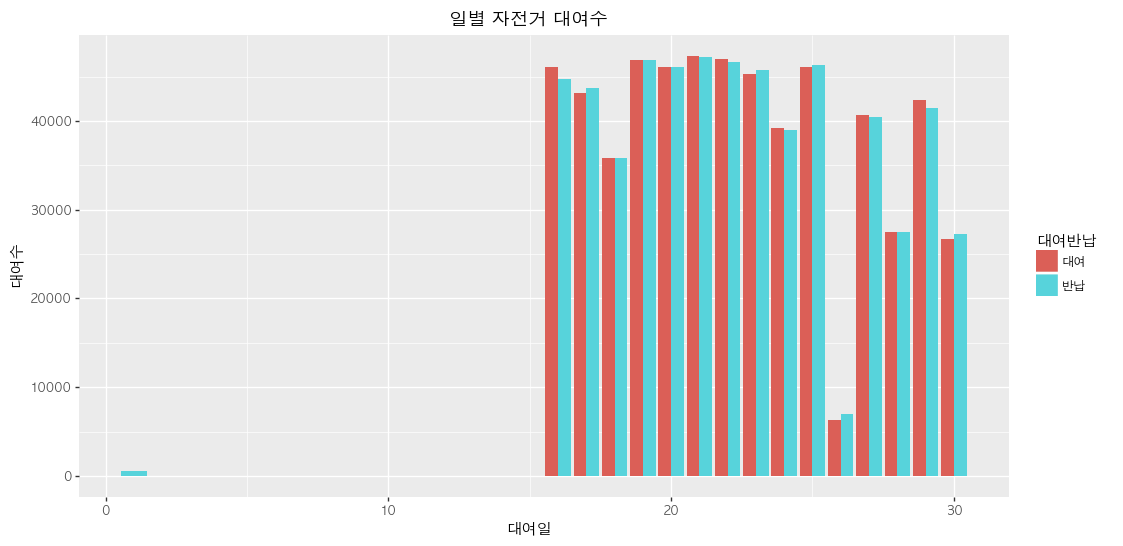

<ggplot: (318944292)>

In [32]:
# plotnine의 ggplot으로 시각화
(ggplot(df_day)
+ aes(x='day', y='count',fill='대여반납')
+ geom_bar(stat='identity',position='dodge')
+ labs(x='대여일', y='대여수', title='일별 자전거 대여수')
+ theme(text=element_text(family=fontprop),figure_size=(12,6))
)

In [33]:
#요일별 대여/반납 현황
df_dow_1 = df['대여요일'].value_counts().reset_index()
df_dow_1.columns = ['dayofweek','count']
df_dow_1 = df_dow_1.sort_values('dayofweek')
df_dow_1['대여반납']='대여'
print(df_dow_1.shape)
df_dow_1.head()

df_dow_2 = df['반납요일'].value_counts().reset_index()
df_dow_2.columns = ['dayofweek','count']
df_dow_2 = df_dow_2.sort_values('dayofweek')
df_dow_2['대여반납']='반납'
print(df_dow_2.shape)
df_dow_2.head()

df_dow = pd.concat([df_dow_1,df_dow_2])
print(df_dow.shape)
df_dow

(7, 3)
(7, 3)
(14, 3)


,dayofweek,count,대여반납
4,0,81933,대여
6,1,53151,대여
2,2,86805,대여
5,3,74772,대여
1,4,89337,대여
0,5,117981,대여
3,6,82325,대여
4,0,82058,반납
6,1,53907,반납
2,2,86535,반납


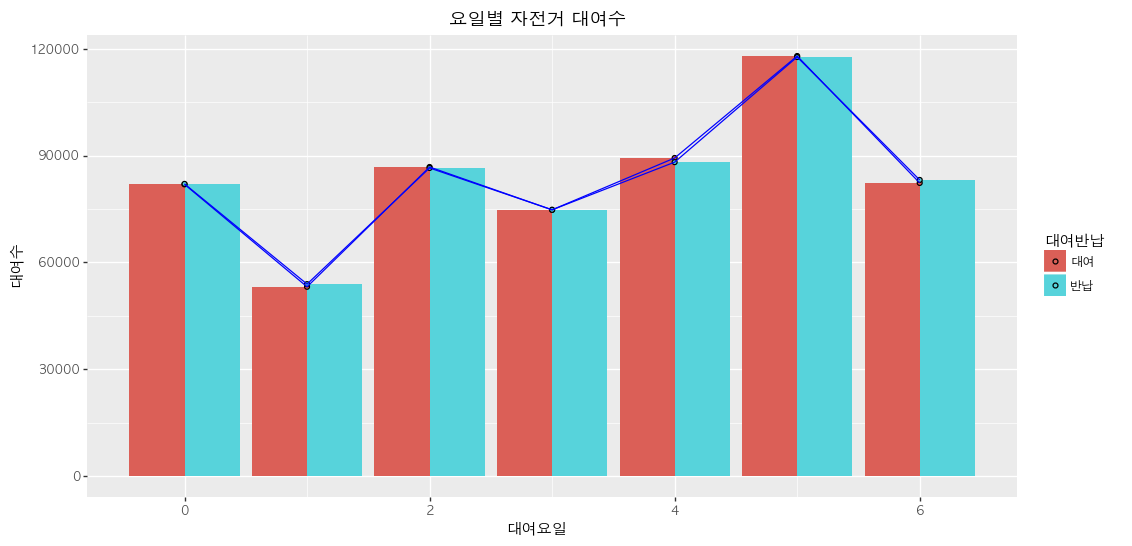

<ggplot: (337786772)>

In [34]:
# plotnine의 ggplot으로 시각화
(ggplot(df_dow)
+ aes(x='dayofweek', y='count',fill='대여반납')
+ geom_bar(stat='identity',position='dodge')
+ geom_point()
+ geom_line(color='blue') 
+ labs(x='대여요일', y='대여수', title='요일별 자전거 대여수')
+ theme(text=element_text(family=fontprop),figure_size=(12,6))
)

In [35]:
#시간대별 대여/반납 현황
df_hour_1 = df['대여시'].value_counts().reset_index()
df_hour_1.columns = ['hour','count']
df_hour_1 = df_hour_1.sort_values('hour')
df_hour_1['대여반납']='대여'
print(df_hour_1.shape)
df_hour_1.head()

df_hour_2 = df['반납시'].value_counts().reset_index()
df_hour_2.columns = ['hour','count']
df_hour_2 = df_hour_2.sort_values('hour')
df_hour_2['대여반납']='반납'
print(df_hour_2.shape)
df_hour_2.head()

df_hour = pd.concat([df_hour_1,df_hour_2])
print(df_hour.shape)
df_hour.head()

(24, 3)
(24, 3)
(48, 3)


,hour,count,대여반납
13,0,19837,대여
17,1,15358,대여
19,2,12255,대여
21,3,7462,대여
23,4,4392,대여


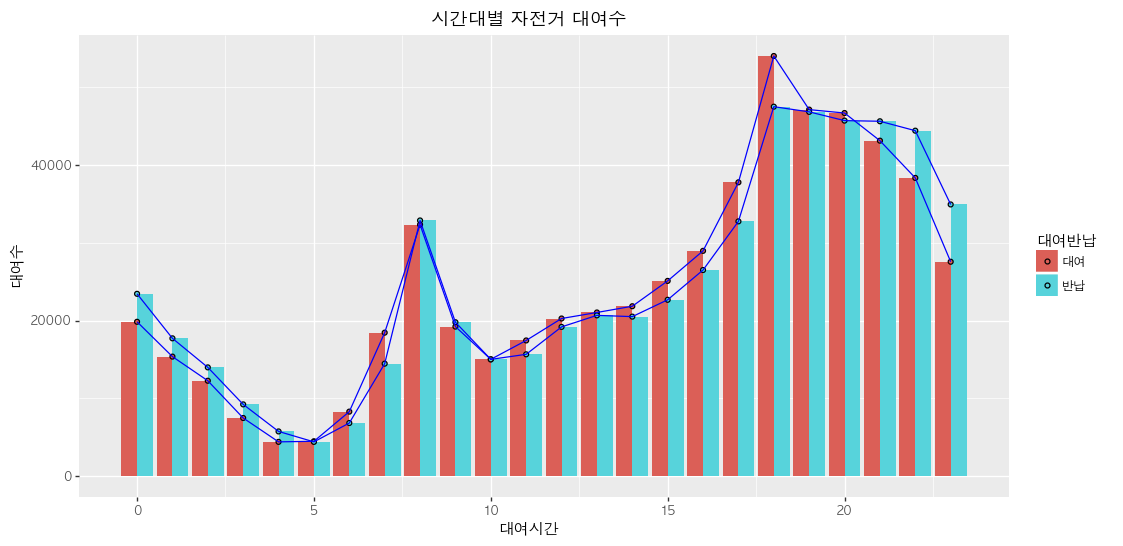

<ggplot: (337767302)>

In [36]:
# plotnine의 ggplot으로 시각화
(ggplot(df_hour)
+ aes(x='hour', y='count',fill='대여반납')
+ geom_bar(stat='identity',position='dodge')
+ geom_point()
+ geom_line(color='blue') 
+ labs(x='대여시간', y='대여수', title='시간대별 자전거 대여수')
+ theme(text=element_text(family=fontprop),figure_size=(12,6))
)

* 새벽시간대로 갈 수록 대여/반납 수가 줄어든다.
* 출근시간에는 대여가 반납보다 많다. 
* 오전 8시대에 대여/반납이 많고, 오후 18시 이후에 대여/반납이 가장 많다.
* 21시 - 오전 4시 : 대여 < 반납
* 오전 11시 - 20시 : 대여 > 반납

In [37]:
#대여와 반납이 같은 곳에 이루어지는지?
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

In [38]:
#같은대여반납소 컬럼을 생성
df['같은대여반납소'] = df['대여대여소명'] == df['반납대여소명']
df.loc[:,['대여대여소명','반납대여소명','같은대여반납소']].head()

,대여대여소명,반납대여소명,같은대여반납소
0,예일여중,신사동 성당,False
1,당산육갑문,독산보도육교 앞 자전거 보관소,False
2,고덕동 주양쇼핑,강일 다솜 어린이 공원,False
3,삼익세라믹아파트교차로,기업은행 앞,False
4,노량진동 맥도널드앞,신길역3번출구,False


In [39]:
#같은대여반납소의 값을 선택해서 새로운 dataframe생성
df_location_diff = df['같은대여반납소'].value_counts().reset_index()
df_location_diff.columns=['일치여부','대여반납수']
df_location_diff.head()
df_location_diff_ratio = df_location_diff['대여반납수'][0] / \
df_location_diff['대여반납수'][1]
print(df_location_diff_ratio)
print('대여와반납이 다른 곳이 {0:.2f}배 많다'.format(df_location_diff_ratio))

7.856020784242644
대여와반납이 다른 곳이 7.86배 많다


In [40]:
df_location_diff

,일치여부,대여반납수
0,False,520100
1,True,66204


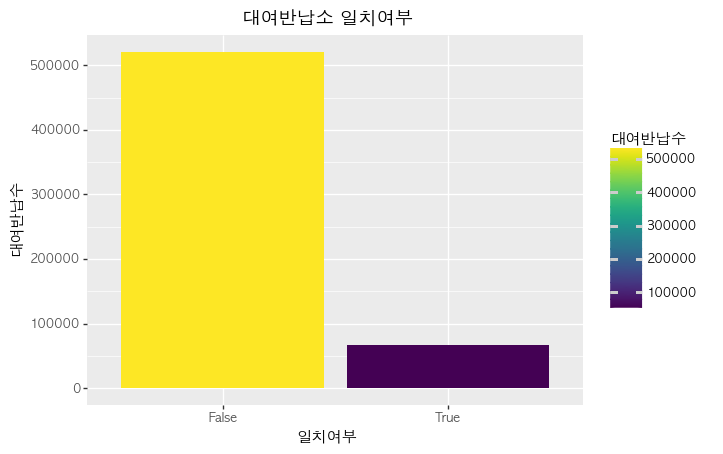

<ggplot: (320089527)>

In [41]:
(ggplot(df_location_diff)
+ geom_col(mapping=aes(x='일치여부',y='대여반납수',fill='대여반납수'))
+ labs(title='대여반납소 일치여부')
+ theme(text=element_text(family=fontprop)) 
)